In [3]:
import pandas as pd

In [4]:
from geopy.distance import geodesic

In [5]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [6]:
combined_data = pd.concat([train_data,test_data],ignore_index=True,axis=0)

In [7]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083778 entries, 0 to 2083777
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   id                  object 
 1   vendor_id           int64  
 2   pickup_datetime     object 
 3   dropoff_datetime    object 
 4   passenger_count     int64  
 5   pickup_longitude    float64
 6   pickup_latitude     float64
 7   dropoff_longitude   float64
 8   dropoff_latitude    float64
 9   store_and_fwd_flag  object 
 10  trip_duration       float64
dtypes: float64(5), int64(2), object(4)
memory usage: 174.9+ MB


In [8]:
combined_data.shape

(2083778, 11)

In [15]:
s_f_c = combined_data.store_and_fwd_flag.value_counts()

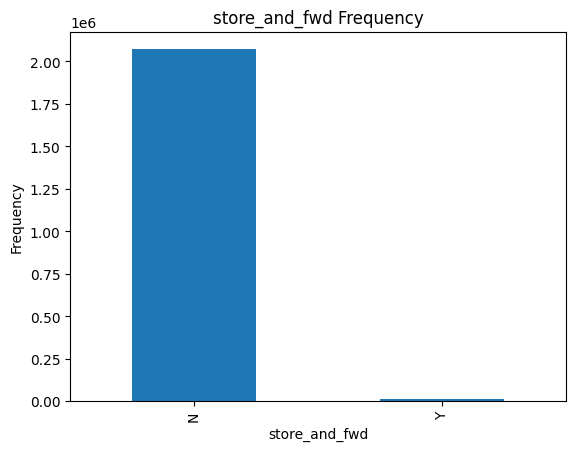

In [18]:
import matplotlib.pyplot as plt
# Plot the frequency of each value
s_f_c.plot(kind='bar')

# Set the plot title and labels
plt.title('store_and_fwd Frequency')
plt.xlabel('store_and_fwd')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [9]:
combined_data.isnull().sum()

id                         0
vendor_id                  0
pickup_datetime            0
dropoff_datetime      625134
passenger_count            0
pickup_longitude           0
pickup_latitude            0
dropoff_longitude          0
dropoff_latitude           0
store_and_fwd_flag         0
trip_duration         625134
dtype: int64

In [10]:
def calculate_distance(row):
    pickup_coords = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff_coords = (row['dropoff_latitude'], row['dropoff_longitude'])
    return geodesic(pickup_coords, dropoff_coords).miles

# Calculate distance between pickup and dropoff coordinates using the defined function
combined_data['distance'] = combined_data.apply(calculate_distance, axis=1)

In [11]:
combined_data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455.0,0.933406
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663.0,1.123849
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124.0,3.964154
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429.0,0.921886
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435.0,0.737591
...,...,...,...,...,...,...,...,...,...,...,...,...
2083773,id3008929,1,2016-01-01 00:02:52,NaN,1,-74.003464,40.725105,-74.001251,40.733643,N,NaN,0.600434
2083774,id3700764,1,2016-01-01 00:01:52,NaN,1,-74.006363,40.743782,-73.953407,40.782467,N,NaN,3.852897
2083775,id2568735,1,2016-01-01 00:01:24,NaN,2,-73.972267,40.759865,-73.876602,40.748665,N,NaN,5.078957
2083776,id1384355,1,2016-01-01 00:00:28,NaN,1,-73.976501,40.733562,-73.854263,40.891788,N,NaN,12.659995


In [12]:
combined_data.isnull().sum()

id                         0
vendor_id                  0
pickup_datetime            0
dropoff_datetime      625134
passenger_count            0
pickup_longitude           0
pickup_latitude            0
dropoff_longitude          0
dropoff_latitude           0
store_and_fwd_flag         0
trip_duration         625134
distance                   0
dtype: int64

In [13]:
combined_data.pickup_datetime.unique()

array(['2016-03-14 17:24:55', '2016-06-12 00:43:35',
       '2016-01-19 11:35:24', ..., '2016-01-01 00:01:24',
       '2016-01-01 00:00:28', '2016-01-01 00:00:22'], dtype=object)